<a href="https://colab.research.google.com/github/cu-applied-math/appm-4600-numerics/blob/main/Demos/Ch2_IntroToBisection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to the bisection method for root finding

We'll demonstrate using [Lambert's W function](https://en.wikipedia.org/wiki/Lambert_W_function) $W$, which is defined as the inverse of $xe^{x}$ (just as the logarithm is the inverse of $e^x$), i.e., $y=W(x)$ means $x=ye^y$.

Thus, to find $y=W(x)$ for a given value of $x$, we solve the root finding problem
$$
ye^y - x = 0
$$
for $y$ (recall, we think of $x$ as fixed).

Let's pick a value of $x$, say, $x=20$.

We'll start by plotting $ye^y - x$ to get an idea of a good interval to start in.  Since $e^y>0$ always, we note that $x$ and $y$ should have the same sign, so we can restrict to $y > 0$.

Demo for APPM 4600

Copyright Department of Applied Mathematics, University of Colorado Boulder. Released under a BSD 3-clause license.

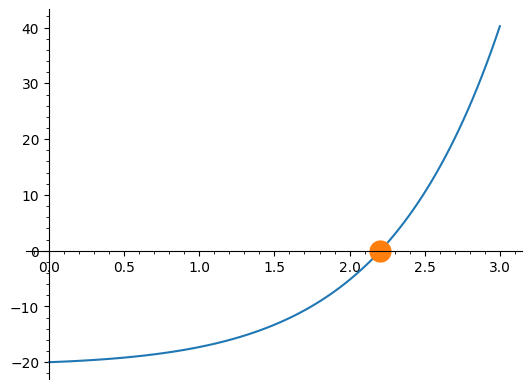

In [1]:
import numpy as np
from matplotlib import pyplot as plt
x = 20
f = lambda y : y*np.exp(y) - x


# Let's also get a "true" answer, or at least a fairly good one
from scipy.special import lambertw as W

trueAnswer    = np.real( W(x) )
relError      = lambda guess : abs( guess - trueAnswer )/abs(trueAnswer)
correctDigits = lambda guess : -np.log10( relError(guess) + 1e-17)

def make_nice_axes(ax, minorticks_on=True):
    "helper function to make nice axes"
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    if minorticks_on: ax.minorticks_on()

# Plotting
yGrid = np.linspace(0,3,100)
fig, ax = plt.subplots()
plt.plot(yGrid,f(yGrid))
plt.plot( trueAnswer,f(trueAnswer),'o',markersize=15)
make_nice_axes(ax)

### Run the code

In [2]:
from scipy.optimize import bisect, root_scalar

p, root_obj = bisect(f, 1.5,2.5, xtol = 1e-14, maxiter = 100, full_output=True )
# That works fine, but it doesn't show is the iteration history,
# which we want to see for educational purposes. So let's record that ourselves.

class objective:
    def __init__(self, f):
        self.f = f
        self.xvals = []
        self.fvals = []
    def __call__(self, x):
        self.xvals.append(x)
        # You can do whatever you want here, e.g., print something out...
        fx = self.f(x)
        self.fvals.append(fx)
        return fx
    def reset(self):
        self.xvals = []
        self.fvals = []
    def get_history(self):
        return self.xvals, self.fvals

obj = objective(f)
# p   = bisect(obj, 1.5,2.5, xtol = 1e-14, maxiter = 100 )
p   = root_scalar(obj, method='bisect', bracket=(1.5,2.5), xtol = 1e-14, maxiter = 100 ) # An equivalent way to call it
history, fcn_history = obj.get_history()
obj.reset()

In [3]:
# Display the results (and the error)

# for i,(p,fp) in enumerate( zip(history,fcn_history) ):
#   print( "Iter {:2d}, p={:.16f}, |f(p)| = {:.2e}. We have {:4.1f} correct digits on p".format(i,p,abs(fp),correctDigits(p)))

# Or for fancier plotting with color to hightlight the correct number of digits
import os
def fancyErrorDisplay( history, fcn_history, trueAnswer):
    # ANSI escape codes for colors
    RED = '\033[31m'
    GREEN = '\033[32m'
    BLUE = '\033[34m'
    RESET = '\033[0m' # Resets to default color and formatting
    tString = f'{trueAnswer:.16f}'
    for i,(p,fp) in enumerate( zip(history,fcn_history) ):
        pString = f'{p:.16f}'
        common = os.path.commonprefix([pString, tString])
        k = len(common)
        print(f"Iter {i:2d}, p={RED}{pString[:k]}{RESET}{pString[k:]}, "\
            f"|f(p)| = {abs(fp):.1e}. We have {correctDigits(p):4.1f} correct digits on p")

fancyErrorDisplay( history, fcn_history, trueAnswer)

Iter  0, p=1.5000000000000000, |f(p)| = 1.3e+01. We have  0.5 correct digits on p
Iter  1, p=2.5000000000000000, |f(p)| = 1.0e+01. We have  0.9 correct digits on p
Iter  2, p=2.0000000000000000, |f(p)| = 5.2e+00. We have  1.0 correct digits on p
Iter  3, p=2.2500000000000000, |f(p)| = 1.3e+00. We have  1.7 correct digits on p
Iter  4, p=2.1250000000000000, |f(p)| = 2.2e+00. We have  1.4 correct digits on p
Iter  5, p=2.1875000000000000, |f(p)| = 5.0e-01. We have  2.1 correct digits on p
Iter  6, p=2.2187500000000000, |f(p)| = 4.0e-01. We have  2.2 correct digits on p
Iter  7, p=2.2031250000000000, |f(p)| = 5.5e-02. We have  3.1 correct digits on p
Iter  8, p=2.2109375000000000, |f(p)| = 1.7e-01. We have  2.6 correct digits on p
Iter  9, p=2.2070312500000000, |f(p)| = 5.9e-02. We have  3.0 correct digits on p
Iter 10, p=2.2050781250000000, |f(p)| = 2.2e-03. We have  4.5 correct digits on p
Iter 11, p=2.2041015625000000, |f(p)| = 2.6e-02. We have  3.4 correct digits on p
Iter 12, p=2.204

In [4]:
# For fun, let's try another method
obj = objective(f)
methods = ['brentq','brenth','ridder','toms748','secant']
for meth in methods:
    obj.reset()
    p   = root_scalar(obj, method=meth, bracket=(1.5,2.5), x0=2,xtol = 1e-14, maxiter = 100 ) # An equivalent way to call it
    history, fcn_history = obj.get_history()
    print('============ Using '+meth+' method ============')
    fancyErrorDisplay( history, fcn_history, trueAnswer)

============ Using brentq method ============
Iter  0, p=1.5000000000000000, |f(p)| = 1.3e+01. We have  0.5 correct digits on p
Iter  1, p=2.5000000000000000, |f(p)| = 1.0e+01. We have  0.9 correct digits on p
Iter  2, p=2.0594351352433131, |f(p)| = 3.9e+00. We have  1.2 correct digits on p
Iter  3, p=2.1780163865413584, |f(p)| = 7.7e-01. We have  1.9 correct digits on p
Iter  4, p=2.2056537414679553, |f(p)| = 1.9e-02. We have  3.5 correct digits on p
Iter  5, p=2.2049916886196281, |f(p)| = 3.4e-04. We have  5.3 correct digits on p
Iter  6, p=2.2050032730795377, |f(p)| = 1.4e-07. We have  8.6 correct digits on p
Iter  7, p=2.2050032780240598, |f(p)| = 3.6e-15. We have 17.0 correct digits on p
Iter  8, p=2.2050032780240656, |f(p)| = 1.6e-13. We have 14.6 correct digits on p
============ Using brenth method ============
Iter  0, p=1.5000000000000000, |f(p)| = 1.3e+01. We have  0.5 correct digits on p
Iter  1, p=2.5000000000000000, |f(p)| = 1.0e+01. We have  0.9 correct digits on p
Iter  

## Plot the error

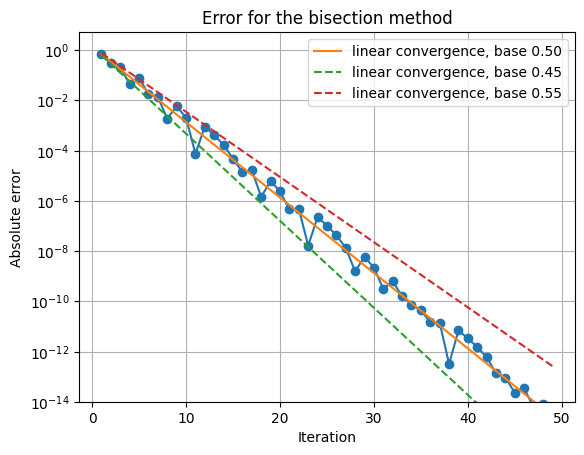

using a least-squares fit, the average error decay is linear with base rho = 0.50


In [14]:
# Back to bisection...
obj.reset()
p   = bisect(obj, 1.5,2.5, xtol = 1e-14, maxiter = 100 )
history, fcn_history = obj.get_history()

# Plot absolute error
fig, ax = plt.subplots()
errors  = np.array(abs(history-trueAnswer))
iters   = 1+np.arange(len(history))
plt.plot( iters, errors ,'o-')
ax.set_yscale('log')
ax.grid()  # Plotting info: https://github.com/matplotlib/cheatsheets
ax.set_ylabel("Absolute error");
ax.set_xlabel("Iteration");
ax.set_title("Error for the bisection method");

# We can also try to fit this
coef = np.polyfit( iters, np.log(abs(history-trueAnswer)), 1   )
rho, const = np.exp(coef)

plt.plot( iters, const*rho**iters, label=f'linear convergence, base {rho:.2f}' )
plt.plot( iters, const*.45**iters, '--',label=f'linear convergence, base {.45:.2f}' )
plt.plot( iters, const*.55**iters, '--',label=f'linear convergence, base {.55:.2f}' )
plt.legend()
ax.set_ylim(bottom=1e-14)
plt.show()
print(f"Using a least-squares fit, the average error decay is linear with base rho = {rho:.2f}")